# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [3]:
# Write your answer here

# Ebola Folder 
DATA_FOLDER_ebola = DATA_FOLDER + '/ebola'
# Directories in the folder
ebola_directories = os.listdir(DATA_FOLDER_ebola)
# Remove License File
del ebola_directories[ebola_directories.index('LICENSE')]

# Names of the columns which contain the total number of daily incidents
data_columns = {'liberia':['Date','Variable', 'National'],
                'sl': ['date','variable', 'National'],
                'guinea':['Date','Description', 'Totals']
               }

### Load All CSV Files Contained In One Folder
TODO : write the explanatory paragraph

In [4]:
# Loads the information relevant to deaths and cases within the csv files contained in the directory for a given country

def load_csv_files_into_dataframe(folder, country):
    country_folder = folder + '/'+ country +'_data'
    csv_files = os.listdir(country_folder)    
    
    all_data = pd.DataFrame()
    
    date = data_columns[country][0]
    description = data_columns[country][1]
    totals = data_columns[country][2]
    
    for i, file in enumerate(csv_files):
        
        daily_csv = pd.read_csv(country_folder + '/' +file)
        
        # Find columns containing death or case keywords
        motives  = daily_csv[description][daily_csv[description].str.contains("death" or "case")]
        # Create a dictionary with the date and country
        daily_dict = {'Date': file[:10], 'Country':country}
        # Add the motives with corresponding total / national values to the dictionary
        daily_dict.update(dict(zip(motives.tolist(), daily_csv[totals][motives.index].tolist())))
        # Append the dictionary to the dataframe
        all_data = all_data.append(daily_dict, ignore_index = True)
    
    all_data.set_index(['Date','Country'], inplace = True)
    return all_data

### Liberia Dataset

In [5]:
liberia_data = load_csv_files_into_dataframe(DATA_FOLDER_ebola,'liberia')

liberia_data.head()

,,Cumulative deaths among HCW,Newly Reported deaths in HCW,Newly reported deaths,Total death/s in confirmed cases,"Total death/s in confirmed, probable, suspected cases",Total death/s in probable cases,Total death/s in suspected cases,"Total death/s in confirmed, probable, suspected cases","Total death/s in confirmed, probable, suspected cases"
Date,Country,,,,,,,,,
2014-06-16,liberia,1.0,0.0,2.0,8.0,16.0,6.0,2.0,NaN,NaN
2014-06-17,liberia,1.0,0.0,0.0,8.0,16.0,6.0,2.0,NaN,NaN
2014-06-22,liberia,1.0,0.0,4.0,16.0,25.0,8.0,1.0,NaN,NaN
2014-06-24,liberia,2.0,0.0,4.0,18.0,32.0,8.0,6.0,NaN,NaN
2014-06-25,liberia,3.0,1.0,3.0,20.0,37.0,8.0,9.0,NaN,NaN


### Guinea Dataset

In [6]:
guinea_data = load_csv_files_into_dataframe(DATA_FOLDER_ebola,'guinea')

guinea_data.head()

,,New deaths registered today,New deaths registered today (confirmed),New deaths registered today (probables),New deaths registered today (suspects),Number of death of confirmed cases among health workers,Number of deaths of confirmed cases among health workers,Number of deaths of probables cases among health workers,Total deaths (confirmed + probables + suspects),Total deaths of confirmed,Total deaths of probables,Total deaths of suspects,Total of deaths in confirmed cases in CTE,New deaths registered,New deaths registered among health workers,Total deaths registered among health workers
Date,Country,,,,,,,,,,,,,,,
2014-08-04,guinea,2.0,2.0,0.0,0.0,0.0,12.0,8.0,363,228,133,2,138.0,NaN,NaN,NaN
2014-08-26,guinea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,958,292,141,2,NaN,5,0,26
2014-08-27,guinea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,438,294,142,2,NaN,2,0,26
2014-08-30,guinea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,324,142,2,NaN,5,0,26
2014-08-31,guinea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489,337,150,2,NaN,3,0,26


### Sierra Leone Dataset

In [7]:
sl_data = load_csv_files_into_dataframe(DATA_FOLDER_ebola,'sl')

sl_data.head()

,,death_confirmed,death_probable,death_suspected,etc_cum_deaths,etc_new_deaths
Date,Country,,,,,
2014-08-12,sl,264,34,5,NaN,NaN
2014-08-13,sl,273,34,5,NaN,NaN
2014-08-14,sl,280,34,5,NaN,NaN
2014-08-15,sl,287,34,5,NaN,NaN
2014-08-16,sl,297,34,5,NaN,NaN


# TODO :  
- Format the dates to be the same for all the datasets
- Decide on what is a case and a death for each country -> add new columns to the existing df
- Merge the new columns of the 3 countries with the indexes to create the final df 

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [8]:
# Write your answer here
DATA_FOLDER_microbiome = DATA_FOLDER + '/microbiome'

# Get all the files in the folder
microbiome_cvs_files = os.listdir(DATA_FOLDER_microbiome)
# Get the 9 first spreadsheets
RNA_seq_files = [x for x in microbiome_cvs_files if 'MID' in x]
# Get the last spreadsheet
metadata_file = [x for x in microbiome_cvs_files if x not in RNA_seq_files]

# Load the metadata into a dataframe
metadata_df = pd.read_excel((DATA_FOLDER_microbiome + '/' + metadata_file[0]))
metadata_columns = metadata_df.columns.values

# Create the dataframe
microbiome_data = pd.DataFrame(index = [])

# Load the 9 spreadsheets into one dataframe
for file in RNA_seq_files:
    # Load the xls file
    df = pd.read_excel(DATA_FOLDER_microbiome + '/' +file,header= None)
    # Get the name of the barcode for the given file
    Barcode_idx = file.replace('.xls','')
    # Get the metadata associated to the given barcode
    file_metadata = metadata_df[metadata_df['BARCODE'].str.contains(Barcode_idx)].values[0]
    
    # Save the metadata to the dataframe
    for c, col in enumerate(metadata_columns):
        df[col] = file_metadata[c]

    # Merge it with the whole dataframe
    microbiome_data = pd.concat([microbiome_data,df])

# Rename the columns and set the Name column as index 
microbiome_data.rename(columns={0:'NAME', 1:'NUMBER'}, inplace=True)
microbiome_data = microbiome_data.set_index(['NAME', 'BARCODE']) # TODO : check if it worked
print("Index is unique : " + str(microbiome_data.index.is_unique))

# Replace all nan values with unknown
microbiome_data = microbiome_data.replace(np.nan, 'unknown', regex=True)

microbiome_data.head()

Index is unique : True


,,NUMBER,GROUP,SAMPLE
NAME,BARCODE,,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",MID1,7,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",MID1,2,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",MID1,3,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",MID1,3,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",MID1,7,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [9]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')
print(' ')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Importing Seaborn for Color Palettes

In [10]:
import seaborn as sns

# set the default color palette
# try other options: 'Blues', sns.cubehelix_palette(8)
sns.set_palette('Blues')

# Seaborn can also use a context for different purpose
# possible values are paper, notebook, talk, and poster
sns.set_context("notebook")

### Loading the Dataset

In [11]:
titanic_data = pd.read_excel(DATA_FOLDER+'/titanic.xls')

titanic_data.head()

#print(titanic_data['fare'].tolist())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 3.1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

TODO : pas compris ce qu'ils entendent par range ni "Indicate and transform the attributes that can be `Categorical`."

Issue with the inf and converting to int

In [12]:
# Transform age to float
titanic_data = pd.read_excel(DATA_FOLDER+'/titanic.xls')


def get_attributes_description(df):
    # Get attribute description
    dicts = []
    dicts.append(df.dtypes.to_dict())
    dicts.append(df.min(skipna = True).to_dict())
    dicts.append(df.max(skipna = True).to_dict())

    attributes = {k:[d[k] for d in dicts] for k in dicts[0] }

    description = pd.DataFrame.from_dict(attributes, orient = 'index')
    description.rename(columns={0:'Type', 1:'Minimum', 2:'Maximum'}, inplace=True)
    return description

titanic_description = get_attributes_description(titanic_data)
print(titanic_description)

              Type              Minimum                      Maximum
fare       float64                    0                      512.329
body       float64                    1                          328
name        object  Abbing, Mr. Anthony  van Melkebeke, Mr. Philemon
embarked    object                  inf                            S
age        float64               0.1667                           80
parch        int64                    0                            9
pclass       int64                    1                            3
sex         object               female                         male
cabin       object                  inf                            T
survived     int64                    0                            1
sibsp        int64                    0                            8
home.dest   object                  inf          Zurich, Switzerland
ticket      object                  695                    WE/P 5735
boat        object                

The attributes which can be defined as categorical are those which have predefined levels such as pclass (3), sex (2), cabin (187), embarked (3) and boat (28).

In [13]:
categorical_attributes = ['pclass', 'sex', 'cabin', 'embarked', 'boat']

categ_titanic = titanic_data.copy()
#categ_titanic = categ_titanic.replace('inf', None, regex=True) # TODO : check if okay... 
#categ_titanic = categ_titanic.replace(np.nan, 'unknown', regex=True) # TODO : check if okay... 

for attribute in categorical_attributes:
    attribute_cat = categ_titanic[attribute].unique().tolist() 
    
    try : 
        categ_titanic[attribute] = categ_titanic[attribute].astype('category')
        categ_titanic[attribute].cat.categories = attribute_cat 
    except : 
        attribute_cat = map(lambda x:x if (x is not np.nan) else 'unknown',attribute_cat)
        categ_titanic[attribute] = categ_titanic[attribute].replace(np.nan, 'unknown', regex=True)
        categ_titanic[attribute] = categ_titanic[attribute].astype('category')
        categ_titanic[attribute].cat.categories = attribute_cat 

categ_titanic_description = get_attributes_description(categ_titanic)
print(categ_titanic_description)

               Type              Minimum                      Maximum
fare        float64                    0                      512.329
body        float64                    1                          328
name         object  Abbing, Mr. Anthony  van Melkebeke, Mr. Philemon
embarked   category                    C                      unknown
age         float64               0.1667                           80
parch         int64                    0                            9
pclass     category                    1                            3
sex        category               female                         male
cabin      category                  A10                      unknown
survived      int64                    0                            1
sibsp         int64                    0                            8
home.dest    object                  inf          Zurich, Switzerland
ticket       object                  695                    WE/P 5735
boat       category 

### 3.2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

TRAVEL CLASS???

TypeError: len() of unsized object

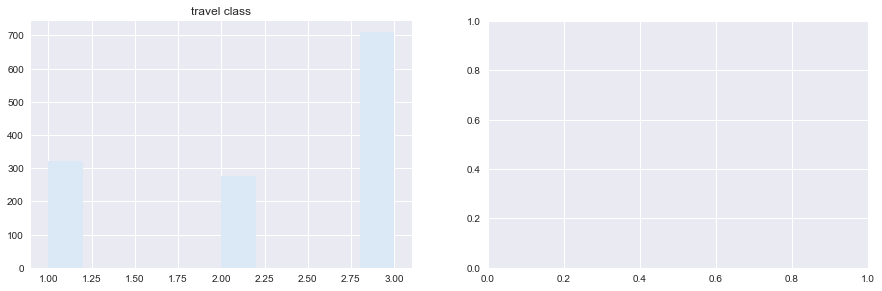

In [14]:
plt.figure(figsize = (15,10))
plt.subplot(221)
categ_titanic['pclass'].hist()
plt.title('travel class')
plt.subplot(222)
categ_titanic['embarked'].hist()
plt.title('embarkation port')
plt.subplot(223)
categ_titanic['sex'].hist()
plt.title('sex')
plt.subplot(221)
categ_titanic['age'].hist(bins = 10)
plt.title('age attributes')
plt.show()

### 3.3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

F    0.790680
C    0.071047
B    0.046600
D    0.037433
E    0.034377
A    0.017571
u    0.000764
G    0.000764
T    0.000764
Name: cabin, dtype: float64


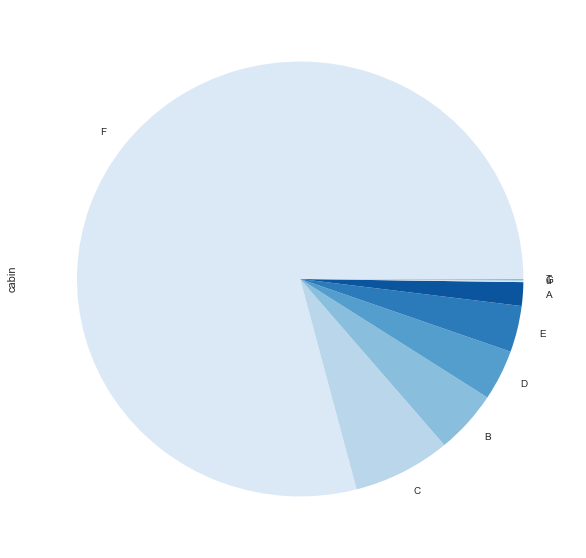

In [36]:
# Extract the cabin floors from the first letter of the cabins
cabin_floors = categ_titanic.cabin.str[0]
# Compute the total number of passengers
num_passengers = len(cabin_floors.tolist())
# Get the number of passengers per floor and compute the proportions
cabin_floors_proportions = cabin_floors.value_counts()/num_passengers
print(cabin_floors_proportions)

plt.figure(figsize = (10,10))
cabin_floors_proportions.plot.pie()

### 3.4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

TODO : Pie chart?? based on the percentages or on the total number? Proportion = survived in class 1 / all passengers or all in class 1

        survived
pclass          
1       0.619195
2       0.429603
3       0.255289


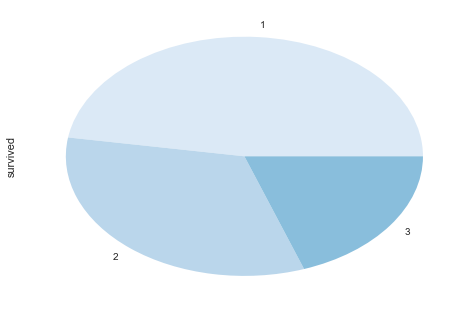

In [46]:
# Groupe the passengers by travel class
travel_classes = categ_titanic.groupby(['pclass'])
# Get the average of passengers that survived for each class
survival_per_class = travel_classes[['pclass', 'survived']].mean()
print(survival_per_class)

survival_per_class['survived'].plot.pie()



### 3.5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

               survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130


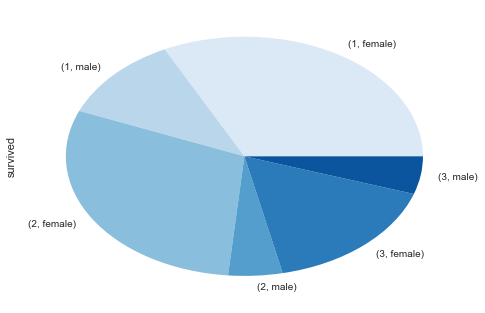

In [47]:
# Groupe the passengers by travel class
travel_classes = categ_titanic.groupby(['pclass', 'sex'])
# Get the average of passengers that survived for each class
survival_per_class = travel_classes[['pclass', 'survived']].mean()
print(survival_per_class)

survival_per_class['survived'].plot.pie()



### 3.6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.